In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('tax_bills_june15_bbls.csv')

In [3]:
df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,bbl,emv,tbea,bav,tba,propertytax,condonumber
count,1.081624e+06,1.073473e+06,1.074509e+06,1.074509e+06,1.040176e+06,1.074509e+06,237110.000000
mean,3.255302e+09,1.072281e+06,3.210457e+04,2.681073e+05,2.136745e+04,2.012084e+04,973.276226
std,1.214484e+09,2.007340e+07,8.811361e+05,8.215277e+06,2.952722e+05,2.881755e+05,882.552609
min,1.000010e+09,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000
25%,3.005150e+09,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.077450e+09,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.090630e+09,NaN,NaN,NaN,NaN,NaN,NaN
max,5.080500e+09,1.457087e+10,6.281640e+08,5.879484e+09,6.733982e+07,6.733982e+07,9566.000000


In [4]:
df.head()

,bbl,ownername,address,taxclass,taxrate,emv,tbea,bav,tba,propertytax,condonumber,condo
0,1000010010,GOVERNORS ISLAND CORPORATION,GOVERNORS ISLAND CORPORATION\nC/O TRUST FOR. G...,4 - commercial property,10.6840%,337672000.0,15749050.0,147407802.0,NaN,0.0,NaN,NaN
1,1000010101,U. S. GOVT LAND & BLDGS,"BEDLOES ISLAND\n1 LIBERTY ISLAND\nELLIS ISLAND,",4 - commercial property,10.6840%,25607000.0,1106496.0,10356570.0,NaN,0.0,NaN,NaN
2,1000010201,U. S. GOVT LAND & BLDGS,"ELLIS ISLAND\n1 LIBERTY ISLAND\nELLIS ISLAND,",4 - commercial property,10.6840%,233982000.0,10366655.0,97029720.0,NaN,0.0,NaN,NaN
3,1000020001,NYC DSBS,"NYC DSBS\n110 WILLIAM ST. FL. 7\nNEW YORK , NY...",4 - commercial property,10.6840%,69458000.0,3163690.0,29611473.0,NaN,0.0,NaN,NaN
4,1000020002,"10 SSA LANDLORD, LLC","10 SSA LANDLORD, LLC\n729 7TH AVE. FL. 15\nNEW...",4 - commercial property,10.6840%,55592000.0,2672762.0,25016491.0,654246.0,654246.0,NaN,NaN


In [5]:
#Breaking BBL into individual columns for Borough(first digit), block(next 5 digits) and lot(next 4 digits)
df['bbl'] = df['bbl'].apply(lambda f: str(f))
df['borough'] = df['bbl'].apply(lambda f: int(f[0]))
df['block'] = df['bbl'].apply(lambda f: int(f[1:6]))
df['lot'] = df['bbl'].apply(lambda f: int(f[-4:]))

In [6]:
df['borough'] = df['borough'].map({1:'Manhattan/new york', 2:'bronx/bronx', 3:'Brooklyn/kings', 4:'queens/queens', 5:'staten/richmond'})

In [7]:
df['borough'].unique()

array(['Manhattan/new york', 'bronx/bronx', 'Brooklyn/kings',
       'queens/queens', 'staten/richmond'], dtype=object)

In [8]:
df[(df['condo'].isnull() == True) & (df['condonumber'].isnull() == False)]

,bbl,ownername,address,taxclass,taxrate,emv,tbea,bav,tba,propertytax,condonumber,condo,borough,block,lot
1000736,5024000105,"FAYER , EDUARD","FAYER , EDUARD\n682 YETMAN AVE.\nSTATEN ISLAND...",4 - commercial property,10.6840%,55429.0,2648.0,24788.0,2648.0,2648.0,115.0,NaN,staten/richmond,2400,105


In [9]:
#The properties with no propertytax and no condonumber/condo type 
#are public places
df.loc[(df['propertytax'].isnull() == True) & (df['condonumber'].isnull() == True),'taxclass'] = 'Public Place'

In [10]:
df['taxclass'].unique()

array(['4 - commercial property', nan,
       '2a - 4-6 unit residential building',
       ' 2 - residential, more than 10 units',
       ' 2c - co-op or condo, less than 11 units', 'Public Place',
       '2b - 7-10 unit residential building',
       ' 1 - small home, less than 4 families', '3 - utility property',
       '1c - condo in 1-3 unit building',
       '1a - condo unit in 1-3 story building',
       ' 1b - vacant land, zoned residential', '1d - bungalow colony'], dtype=object)

In [11]:
#properties with non-null condo but no property tax are government owned properties(police offices etc.)
df.loc[(df['propertytax'].isnull() == True) & (df['condonumber'].isnull() == False),'taxclass'] = 'Govt Building'

In [12]:
df['taxclass'].unique()

array(['4 - commercial property', 'Govt Building',
       '2a - 4-6 unit residential building',
       ' 2 - residential, more than 10 units',
       ' 2c - co-op or condo, less than 11 units', 'Public Place',
       '2b - 7-10 unit residential building',
       ' 1 - small home, less than 4 families', nan,
       '3 - utility property', '1c - condo in 1-3 unit building',
       '1a - condo unit in 1-3 story building',
       ' 1b - vacant land, zoned residential', '1d - bungalow colony'], dtype=object)

In [13]:
df[df['taxclass'].isnull() == True].shape

(1036, 15)

In [14]:
df[df['taxclass'].isnull() == True]

,bbl,ownername,address,taxclass,taxrate,emv,tbea,bav,tba,propertytax,condonumber,condo,borough,block,lot
8478,1000940001,SOUTHBRIDGE TOWERS INC.,PRC MANAGEMENT\n240 MADISON AVE. FL. 9\nNEW YO...,NaN,NaN,NaN,747908.0,747908.0,747908.0,580462.0,NaN,NaN,Manhattan/new york,94,1
8481,1000950027,ST. MARGARET’S HOUSE,ST. MARGARET’S HOUSE\nHOUSING DEVELOPMENT FUND...,NaN,NaN,NaN,826371.0,826371.0,826371.0,826371.0,NaN,NaN,Manhattan/new york,95,27
16021,1002430056,NOT ON FILE,"OWNER/AGENT\n645 WATER ST.\nNEW YORK , NY 1000...",NaN,NaN,NaN,117519.0,117519.0,117519.0,72375.0,NaN,NaN,Manhattan/new york,243,56
16023,1002440019,GOUVENEUR GARDENS HSG. CORP.,GOUVENEUR GARDENS HSG. CORP.\nDOUGLAS ELLIMAN ...,NaN,NaN,NaN,37665.0,37665.0,37665.0,18701.0,NaN,NaN,Manhattan/new york,244,19
16089,1002470001,HP CHERRY STREET HOUSING DEVELOPMEN,HP CHERRY STREET HOUSING DEVELOPMENT\n242 W. 3...,NaN,NaN,NaN,1014007.0,1014007.0,1014007.0,1014007.0,NaN,NaN,Manhattan/new york,247,1
16093,1002480070,TWO BRIDGES SENIOR APARTMENTS LP.,TWO BRIDGES SENIOR APARTMENTS LP.\n1230 PENNSY...,NaN,NaN,NaN,425923.0,425923.0,425923.0,425923.0,NaN,NaN,Manhattan/new york,248,70
16112,1002590001,GOUVENEUR GARDENS HSG. CORP.,GOUVENEUR GARDENS HSG. CORP.\nDOUGLAS ELLIMAN ...,NaN,NaN,NaN,34450.0,34450.0,34450.0,12760.0,NaN,NaN,Manhattan/new york,259,1
16125,1002670001,NOT ON FILE,"OWNER/AGENT\n305 MADISON ST.\nNEW YORK , NY 10...",NaN,NaN,NaN,78079.0,78079.0,78079.0,65094.0,NaN,NaN,Manhattan/new york,267,1
17973,1003330001,MASARYK TOWERS CORP.,MASARYK TOWERS CORP.\nMASARYK TOWERS C/O METRO...,NaN,NaN,NaN,963963.0,963963.0,963963.0,927505.0,NaN,NaN,Manhattan/new york,333,1
17977,1003360005,"UJC ORENSTEIN PRESERVATION HDFC, INC.","UJC ORENSTEIN PRESERVATION HDFC, INC.\n235 E. ...",NaN,NaN,NaN,200000.0,200000.0,200000.0,200000.0,NaN,NaN,Manhattan/new york,336,5


In [17]:
df.dtypes

bbl             object
ownername       object
address         object
taxclass        object
taxrate         object
emv            float64
tbea           float64
bav            float64
tba            float64
propertytax    float64
condonumber    float64
condo           object
borough         object
block            int64
lot              int64
dtype: object

In [19]:
str(df['taxclass'].iloc[0])

'4 - commercial property'

In [20]:
df['taxclass'].iloc[0]

'4 - commercial property'

In [21]:
len(str(df['taxclass'].iloc[0]))

23

In [22]:
def building_type(row):
    if (row['taxclass'] == '4 - commercial property') | (row['taxclass'] == '3 - utility property'):
        return 'Commercial'
    if row['taxclass'] == 'Govt Building':
        return 'Govt Building'
    if row['taxclass'] == 'Public Place':
        return 'Public Place'
    if len(str(row['taxclass'])) > 1:
        return 'Residential'
    return row['taxclass']
df['type'] = df.apply(building_type, axis = 1)

In [26]:
df['type'].unique()

array(['Commercial', 'Govt Building', 'Residential', 'Public Place'], dtype=object)

In [27]:
df[df['taxclass'].isnull() == True]['type']

8478       Residential
8481       Residential
16021      Residential
16023      Residential
16089      Residential
16093      Residential
16112      Residential
16125      Residential
17973      Residential
17977      Residential
17987      Residential
17990      Residential
17991      Residential
17997      Residential
18109      Residential
18122      Residential
18175      Residential
18178      Residential
18610      Residential
18800      Residential
18917      Residential
18926      Residential
19038      Residential
19135      Residential
19165      Residential
19264      Residential
19265      Residential
19268      Residential
19277      Residential
19282      Residential
              ...     
935687     Residential
937751     Residential
938717     Residential
939235     Residential
939411     Residential
942619     Residential
942688     Residential
942690     Residential
942691     Residential
943029     Residential
943629     Residential
947968     Residential
949120     

In [28]:
df[df['taxclass'].isnull() == True].shape

(1036, 16)

In [30]:
df.loc[df['taxclass'].isnull() == True, 'type'] = np.NaN

In [31]:
df['type'].unique()

array(['Commercial', 'Govt Building', 'Residential', 'Public Place', nan], dtype=object)

In [32]:
df['type'].groupby(df['borough'])

In [33]:
df['type'].groupby(df['borough']).describe()

borough                   
Brooklyn/kings      count          330396
                    unique              4
                    top       Residential
                    freq           290815
Manhattan/new york  count          151237
                    unique              4
                    top       Residential
                    freq           125783
bronx/bronx         count          102321
                    unique              4
                    top       Residential
                    freq            91092
queens/queens       count          362526
                    unique              4
                    top       Residential
                    freq           331697
staten/richmond     count          134108
                    unique              4
                    top       Residential
                    freq           127359
Name: type, dtype: object

In [34]:
type_borough = df['type'].groupby(df['borough'])

In [36]:
type_borough.count()

borough
Brooklyn/kings        330396
Manhattan/new york    151237
bronx/bronx           102321
queens/queens         362526
staten/richmond       134108
Name: type, dtype: int64

In [37]:
type_borough.describe()

borough                   
Brooklyn/kings      count          330396
                    unique              4
                    top       Residential
                    freq           290815
Manhattan/new york  count          151237
                    unique              4
                    top       Residential
                    freq           125783
bronx/bronx         count          102321
                    unique              4
                    top       Residential
                    freq            91092
queens/queens       count          362526
                    unique              4
                    top       Residential
                    freq           331697
staten/richmond     count          134108
                    unique              4
                    top       Residential
                    freq           127359
Name: type, dtype: object

In [38]:
type_borough.count('Residential')

TypeError: count() takes 1 positional argument but 2 were given

In [39]:
type_borough.apply(pd.value_counts)

borough                          
Brooklyn/kings      Residential      290815
                    Commercial        36444
                    Govt Building      2739
                    Public Place        398
Manhattan/new york  Residential      125783
                    Commercial        23004
                    Govt Building      2254
                    Public Place        196
bronx/bronx         Residential       91092
                    Commercial        10970
                    Govt Building       144
                    Public Place        115
queens/queens       Residential      331697
                    Commercial        29678
                    Govt Building       907
                    Public Place        244
staten/richmond     Residential      127359
                    Commercial         6631
                    Govt Building        78
                    Public Place         40
Name: type, dtype: int64

In [40]:
type_borough = type_borough.apply(pd.value_counts)

In [41]:
type_borough

borough                          
Brooklyn/kings      Residential      290815
                    Commercial        36444
                    Govt Building      2739
                    Public Place        398
Manhattan/new york  Residential      125783
                    Commercial        23004
                    Govt Building      2254
                    Public Place        196
bronx/bronx         Residential       91092
                    Commercial        10970
                    Govt Building       144
                    Public Place        115
queens/queens       Residential      331697
                    Commercial        29678
                    Govt Building       907
                    Public Place        244
staten/richmond     Residential      127359
                    Commercial         6631
                    Govt Building        78
                    Public Place         40
Name: type, dtype: int64

In [42]:
type_borough.dtypes

dtype('int64')

In [43]:
type_borough.describe()

count        20.00000
mean      54029.40000
std       97188.99666
min          40.00000
25%         232.00000
50%        4685.00000
75%       50106.00000
max      331697.00000
Name: type, dtype: float64

In [44]:
type(type_borough)

pandas.core.series.Series

In [51]:
type_borough.iloc[0]

290815

In [52]:
type_borough.shape

(20,)

In [55]:
type_borough.loc['Manhattan/new york']

Residential      125783
Commercial        23004
Govt Building      2254
Public Place        196
Name: type, dtype: int64

In [56]:
type_borough.loc['Manhattan/new york']['Residential']

125783

In [57]:
len(type_borough)

20

In [58]:
type(type_borough.loc['Manhattan/new york'])

pandas.core.series.Series

In [63]:
type_borough.xs('Residential', level = 1, axis = 0)

borough
Brooklyn/kings        290815
Manhattan/new york    125783
bronx/bronx            91092
queens/queens         331697
staten/richmond       127359
Name: type, dtype: int64

In [64]:
resd = type_borough.xs('Residential', level = 1, axis = 0)

In [66]:
comm = type_borough.xs('Commercial', level = 1, axis = 0)

In [67]:
govt = type_borough.xs('Govt Building', level = 1, axis = 0)

In [68]:
public = type_borough.xs('Public Place', level = 1, axis = 0)

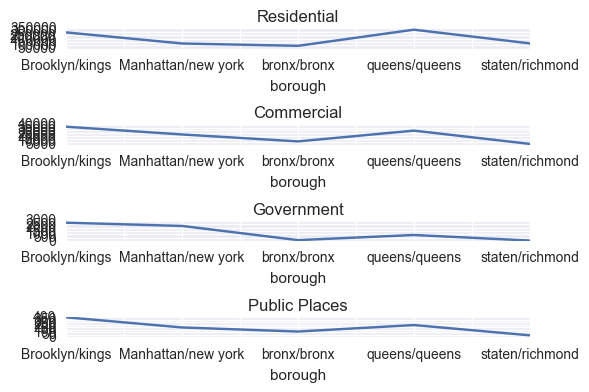

In [69]:
plt.figure(1)
plt.subplot(411)
resd.plot(title = 'Residential')

plt.subplot(412)
comm.plot(title = 'Commercial')

plt.subplot(413)
govt.plot(title = 'Government')

plt.subplot(414)
public.plot(title = 'Public Places')

plt.tight_layout()
plt.show()

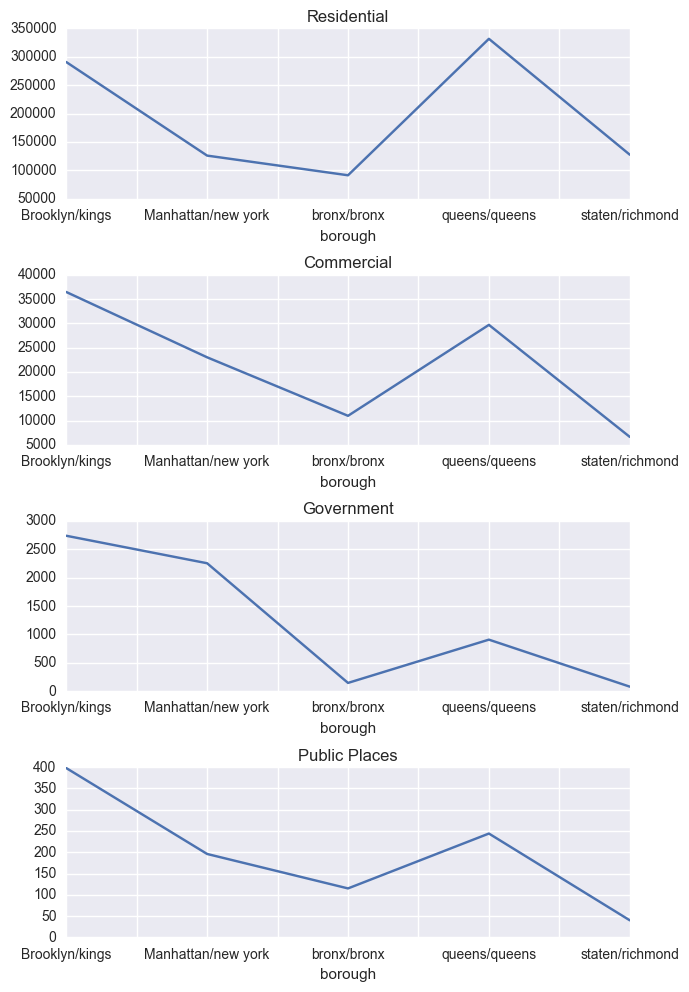

In [70]:
plt.figure(figsize = (7, 10))
plt.subplot(411)
resd.plot(title = 'Residential')

plt.subplot(412)
comm.plot(title = 'Commercial')

plt.subplot(413)
govt.plot(title = 'Government')

plt.subplot(414)
public.plot(title = 'Public Places')

plt.tight_layout()
plt.show()

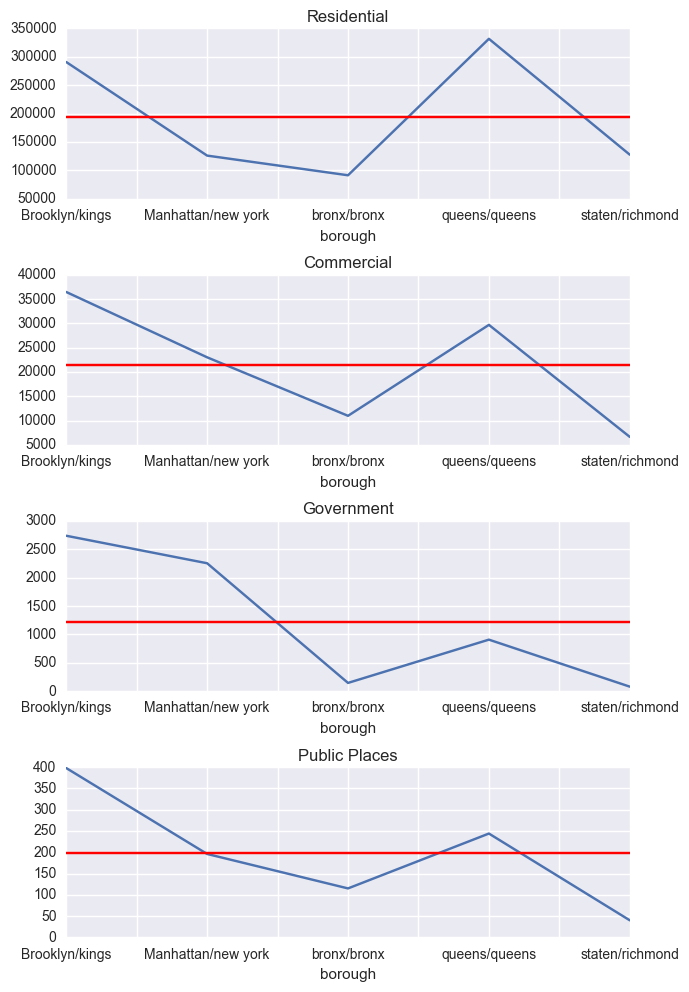

In [71]:
plt.figure(figsize = (7, 10))
plt.subplot(411)
resd.plot(title = 'Residential')
plt.axhline(y = resd.mean(), color = 'r')

plt.subplot(412)
comm.plot(title = 'Commercial')
plt.axhline(y = comm.mean(), color = 'r')

plt.subplot(413)
govt.plot(title = 'Government')
plt.axhline(y = govt.mean(), color = 'r')

plt.subplot(414)
public.plot(title = 'Public Places')
plt.axhline(y = public.mean(), color = 'r')

plt.tight_layout()
plt.show()

In [ ]:
#from the above data we can infer that the number of commercial
#spaces in an area is in accordance with residential spaces 
#in comparison with other areas